# **No todos los valores son del mismo tipo, tiene divisiones**

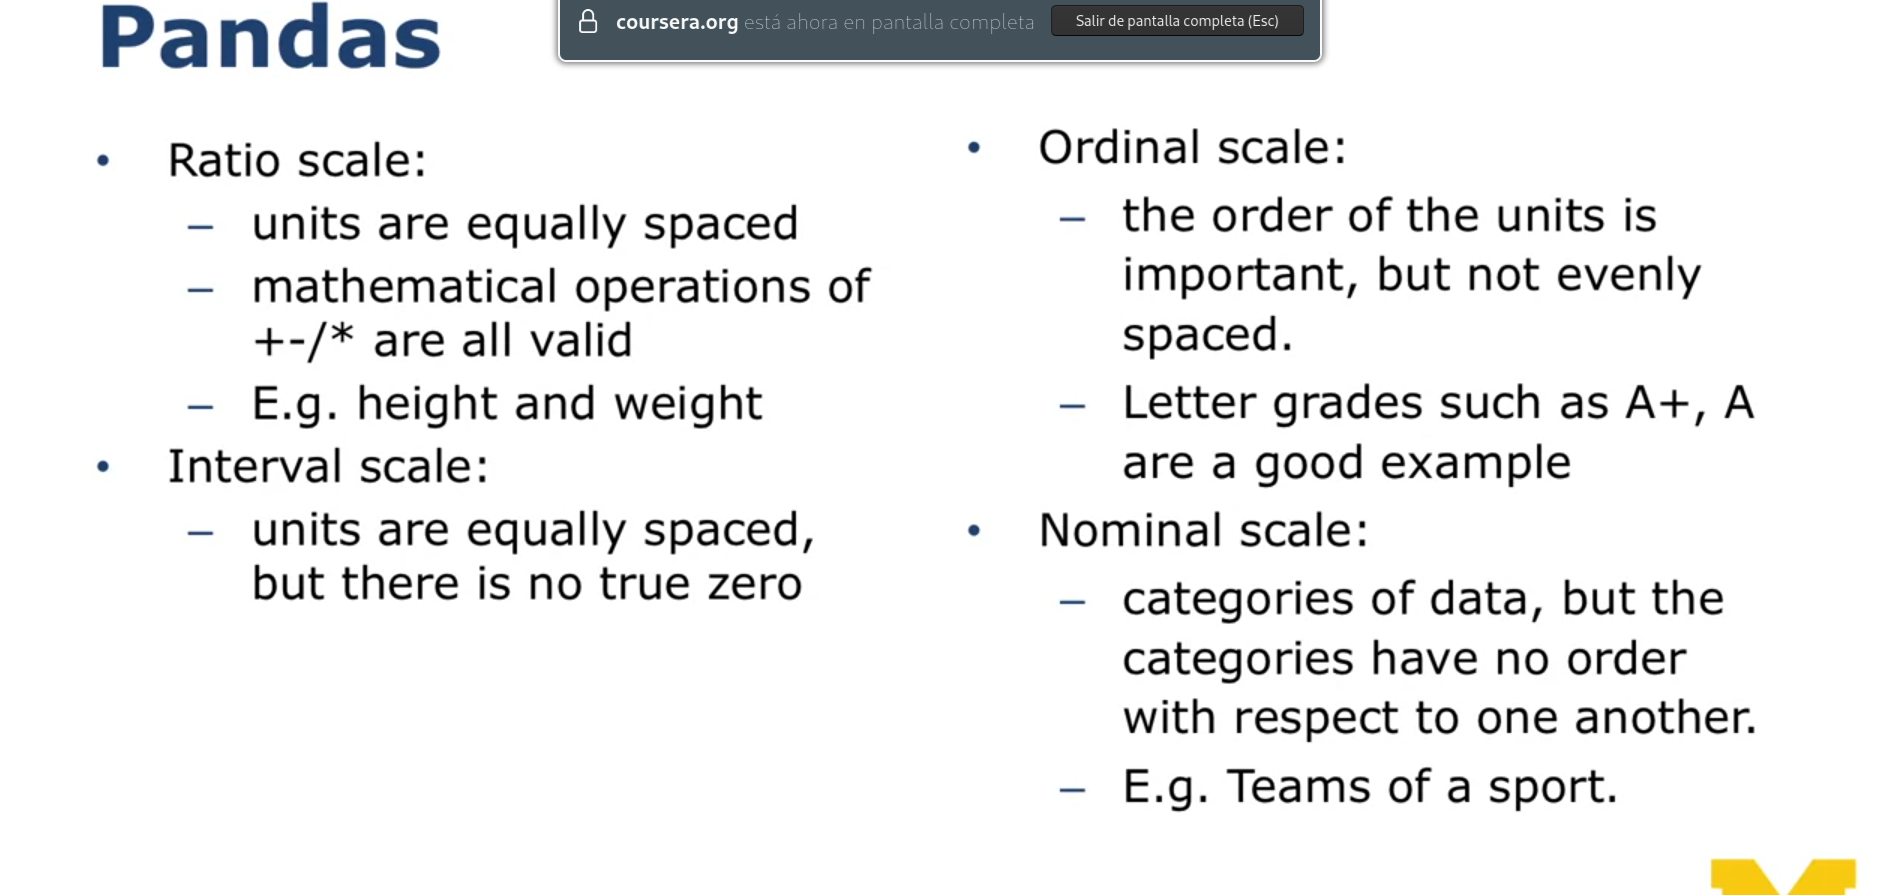

**Estos son llamados Scales**

Nominal data = Categorical data

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(["A+","A","A-","B+","B","B-","C+","C","C-","D+","D"],index=["excellent","excellent","excellent","good","good","good","ok","ok","ok","poor","poor"],
columns=["Grades"])


df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [4]:
df.dtypes

Grades    object
dtype: object

In [6]:
# Podemos cambiar el tipo de dato de la columna a categorico con la funcion astype
df["Grades"].astype("category")


excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): ['A', 'A+', 'A-', 'B', ..., 'C+', 'C-', 'D', 'D+']

In [7]:
my_categories = pd.CategoricalDtype(categories=["D","D+","C-","C","C+","B-","B","B+","A-","A","A+"],ordered=True)

grades = df["Grades"].astype(my_categories)
grades

#Hemos creado una categoria ordenada, que es ordinal, por lo que podemos comparar los valores de la columna

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

In [8]:
df[df["Grades"] > "C"]

,Grades
ok,C+
ok,C-
poor,D+
poor,D


In [13]:
grades[grades > "C"]

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

In [22]:
grades.min()

'D'

In [33]:
import numpy as np
df = pd.read_csv("census.csv")

df = df[df["SUMLEV"] == 50]

df = df.set_index("STNAME").groupby(level=0)["CENSUS2010POP"].agg(np.average)


In [37]:
i = pd.cut(df,10)
i

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

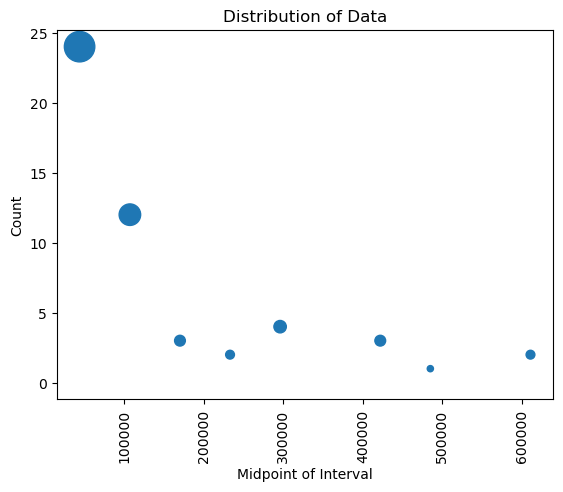

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que 'i' es una Serie de pandas con los nombres de los estados como índices
# y los intervalos como valores. Por ejemplo:
# i = pd.Series({'Alabama': pd.Interval(11706.087, 75333.413), 'Alaska': pd.Interval(11706.087, 75333.413), ...})

# Calcular los conteos de valores
counts = i.value_counts()

# Calcular los puntos medios de los intervalos
midpoints = counts.index.map(lambda x: x.mid)

# Crear el gráfico de dispersión
plt.scatter(midpoints, counts, s=counts*20)
plt.xlabel('Midpoint of Interval')
plt.ylabel('Count')
plt.title('Distribution of Data')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles
plt.show()